# <font color=red>Virtual Sommolier</font>

## Cole Mark Olafson and Matt Schwartz

## CPSC 322-01, Spring 2021

# Introduction:
Our motivation to build this was our shared interest in wine. 

This helps solve the problem of  not knowing whether or not a certain bottle of wine is good or bad.

We found that the Random Forest Classifier worked best for our purposes. We found that within 2 points of the actual value, it was over 70% accurate.

This was better when we compared them to the Niave Bayes and Decision Tree classifiers which were in the 60% ranges. 




# Data Analysis:

The dataset is a list of thousands of wines along with their rating, price, country of origin, and the type of wine it is. 

It originally had 150k entries but we cut it down to around 10k to make it easier to work with.

While there were other attributes to choose from, those were mostly descriptions that would have required a lot of text mining to make use of. 

The attribute we chose were: Country, Province, Price, and the type of wine.

The Province of a wine is the more local are that it is from. For example, in wines from the states the Province is the state it is from. 



In [70]:
import importlib

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

# uncomment once you paste your mypytable.py into mysklearn package
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MySimpleLinearRegressor, MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyRandomForestGenerator

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluationn

import mysklearn.plot_utils
importlib.reload(mysklearn.plot_utils)
import mysklearn.plot_utils as plot_utils

table = MyPyTable()
table.load_from_file("input_data/winemag-data_first150k.csv")
country = table.get_column("country")



nam = []
val = []
for x in country:
    if x in nam:
        index = nam.index(x)
        val[index]+=1
    else:
        nam.append(x)
        val.append(1)

name = []
vals = []
other_val = 0
indexes = []
for index in range(len(val)):
    if val[index] < 7500:
        other_val += val[index]
        indexes.append(index)
    else:
        vals.append(val[index])
        name.append(nam[index])
        
name.append("Other")
vals.append(other_val)
table.remove_rows_with_missing_values()

scores = table.get_column("points")
price = table.get_column("price")


#remove huge outlier
for x in price:
    x = int(x)
max_ind = price.index(max(price))
del price[max_ind]
del scores[max_ind]
del country[max_ind]





# Make a freq chart when dicretized

## Scores By Price

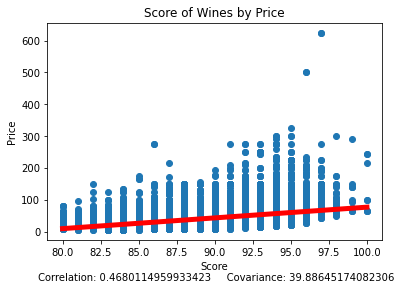

In [62]:
plot_utils.makeScatterPlot(scores,price,"Score","Price", "Score of Wines by Price")

Fig 1: By viewing this scatter plot, it is apparent that there is a low-positive correlation between the score a wine will recieve and its price. 

## Score Distribution

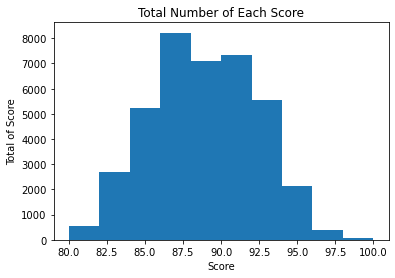

In [63]:
plot_utils.makeHistogram(scores, "Score","Total of Score","Total Number of Each Score")

Fig 2: In viewing this Histogram, it is shown that the score distribution for wine is that of a normal distribution

## Show Distribution Of Prices

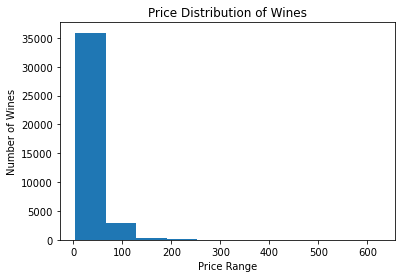

In [64]:
plot_utils.makeHistogram(price,"Price Range","Number of Wines","Price Distribution of Wines")

Fig 3: In viewing this histogram, it is shown that the distribution of prices is heavily skewed right

## Country Distribution

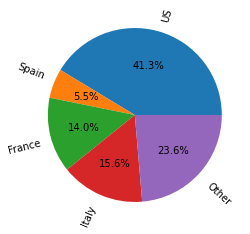

In [65]:
plot_utils.makePieChart(name,vals)

Fig 4: Shows the United States is the country with the largest wine output, with second and third belonging to Italy and France respectively

# Classification Results:

## Random Forest


In [69]:
table = MyPyTable()
table.load_from_file("input_data/winemag-data_first150k.csv")
country = table.get_column("country")
province = table.get_column("province")
price = table.get_column("price")
variety = table.get_column("variety")

wine_data = []
for x in range(len(country)):
    entry = []
    entry.append(country[x])
    entry.append(province[x])
    entry.append(price[x])
    entry.append(variety[x])
    wine_data.append(entry)
wine_data = wine_data[:10000]

scores = table.get_column("points")
normal_scores =[]
for x in scores[:10000]:
    normal_scores.append(myutils.normailze_wine_score(x))

train_x,test_x,train_y, test_y = myevaluationn.train_test_split(wine_data,normal_scores)

forest = MyRandomForestGenerator()
forest.fit(train_x, train_y, 100, 7, 2) 
answers = forest.predict(test_x)
accuracy = 0 
for index in range(len(answers)):
    if answers[index] == test_y[index]:
        accuracy+=1
accuracy = accuracy/len(answers)
print("Accuracy = "+ str(accuracy))



Accuracy = 0.6607088760981521


## Decision Tree


In [67]:
decision = MyDecisionTreeClassifier()
decision.fit(wine_data,normal_scores) 
answers = decision.predict(test_x)
accuracy = 0 
for index in range(len(answers)):
    if answers[index] == test_y[index]:
        accuracy+=1
accuracy = accuracy/len(answers)
print("Accuracy = "+ str(accuracy))

Accuracy = 0.6785822478036958


## Naive Bayes


In [68]:
bayes = MyNaiveBayesClassifier()
bayes.fit(wine_data, normal_scores)
answers = bayes.predict(test_x)
accuracy = 0 
for index in range(len(answers)):
    if answers[index] == test_y[index]:
        accuracy+=1
accuracy = accuracy/len(answers)
print("Accuracy = "+ str(accuracy))


Accuracy = 0.6800969403211148


While here it looks like Random Forest is not the best, when we look to see if the answers were within 2 points of the actuall answer, the Random forest exceded the accuracy of the other two classifiers. That is why we went with it. 

https://virtual-sommolier.herokuapp.com/

predict?country=<country>&province=<province>&price=<price>&variety=<variety>

Add this to the end of the URL with your own inputs to see the prediction. 

# Conclusion:
In conclusion, the wine data set we used was interesting however had a lot of variability within its values which made it difficult to work with. This posed as a challenge and is an area that we could clean up for future use by normalizing the prices. The classification approach that we followed was that of the random forest classifier as when it had a a deviation of two points it proved to be the most accurate (over 70%) which we thought was better than the decision tree or naive bayes approach that had higher initial accuracies.